In [ ]:
!pip install pandas numpy matplotlib seaborn missingno plotly wordcloud scikit-learn xgboost spacy lime joblib

In [1]:
!python3 -m spacy download en_core_web_sm

C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe: No module named spacy


The Ecommerce text classification dataset has 50425 rows and 2 Columns
The Ecommerce text classification dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50425 non-null  object
 1   text    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None
Null Values in each col in the Ecommerce text classification dataset:

label    0
text     1
dtype: int64


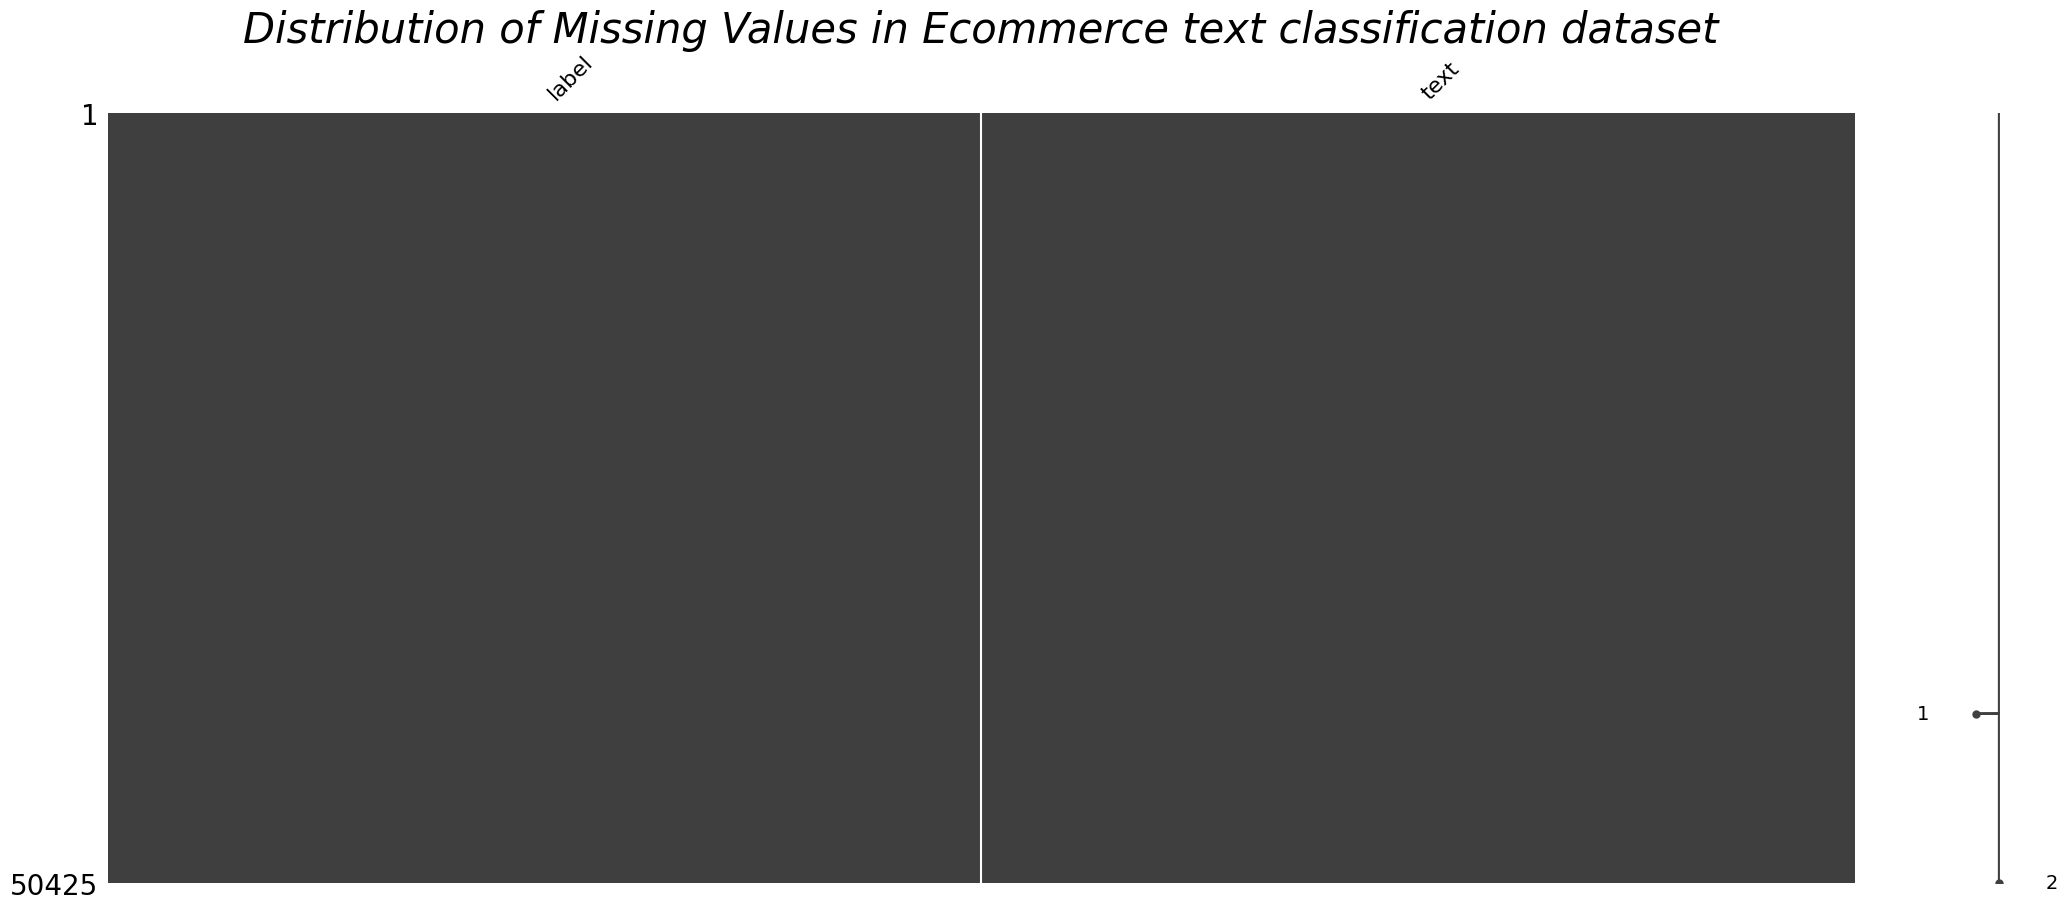

The number of unique values in each column in Ecommerce text classification dataset:

label        4
text     27802
dtype: int64


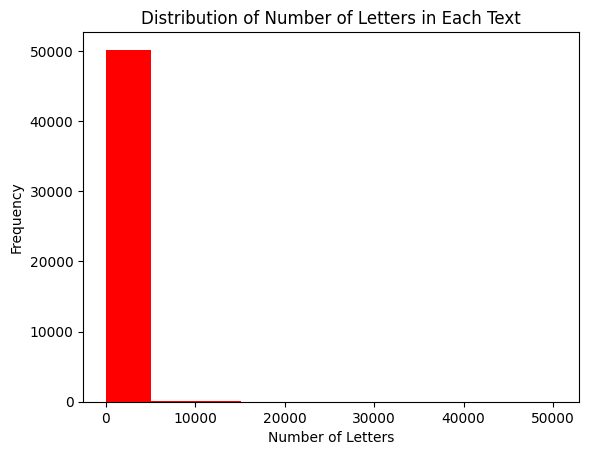

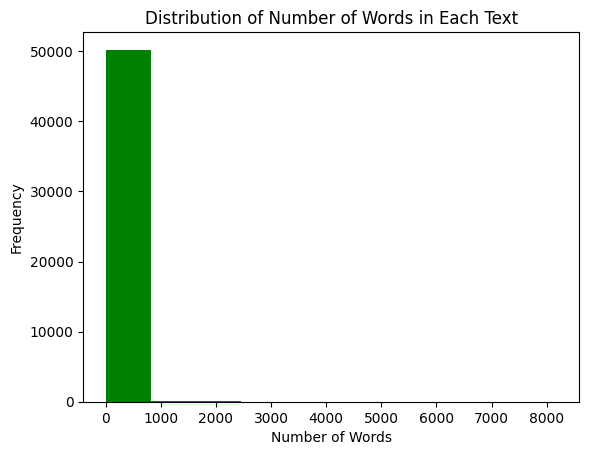

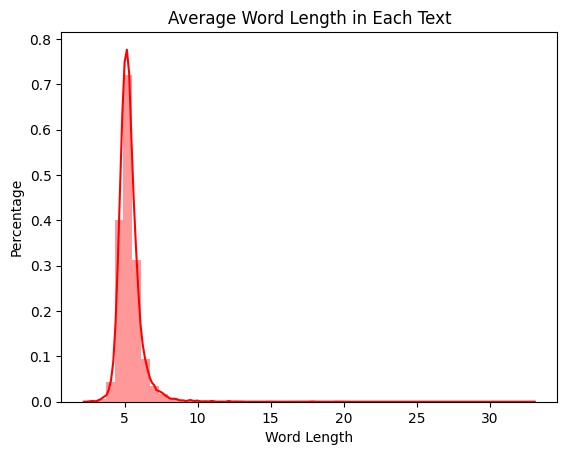

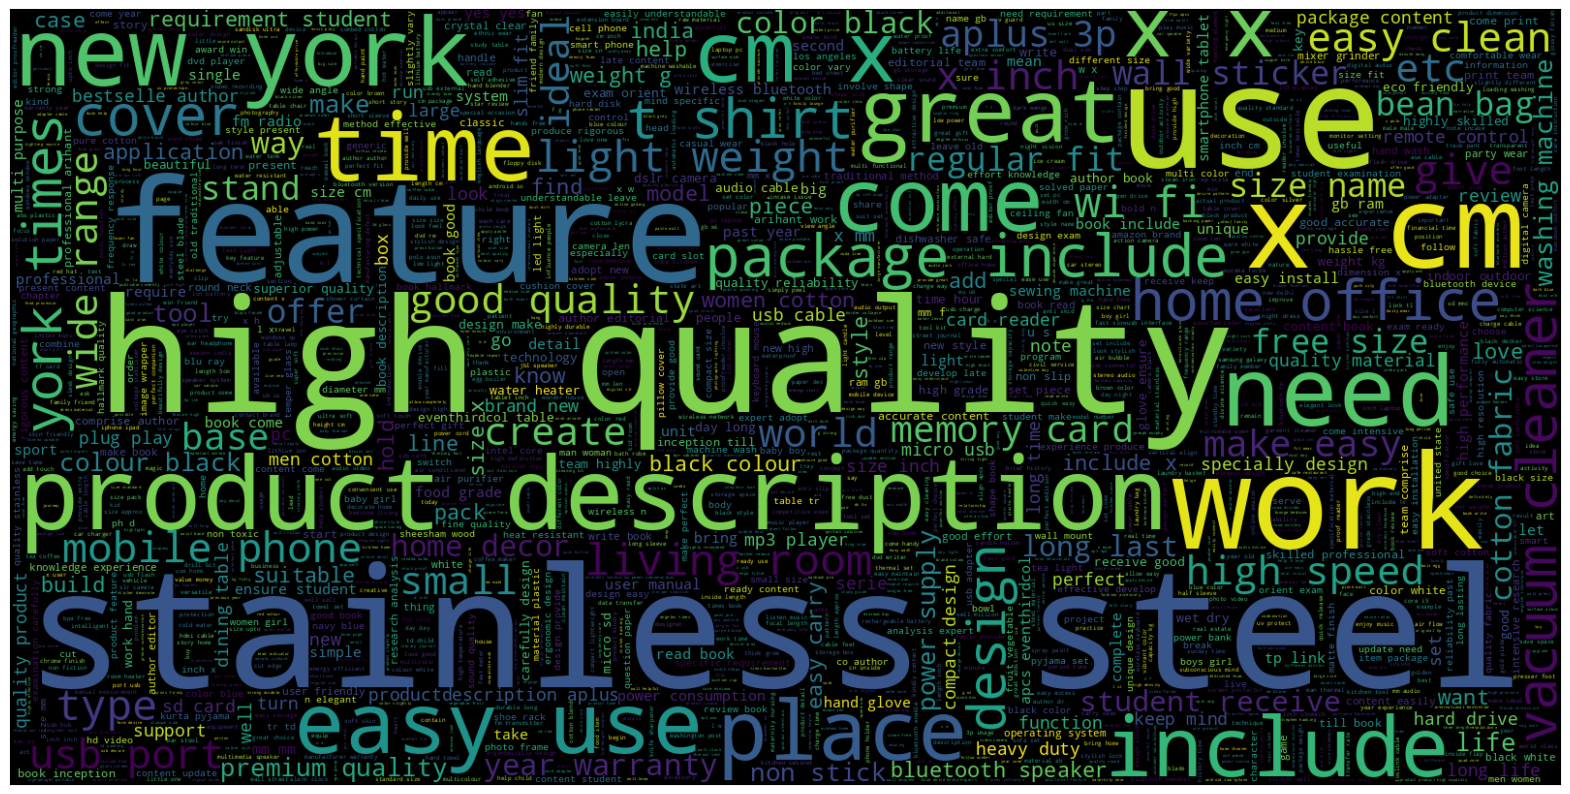

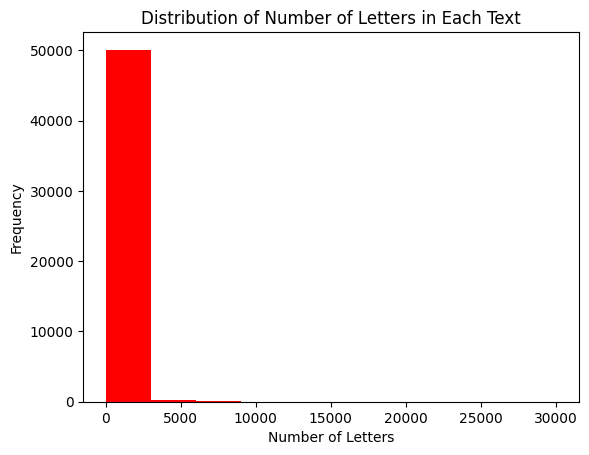

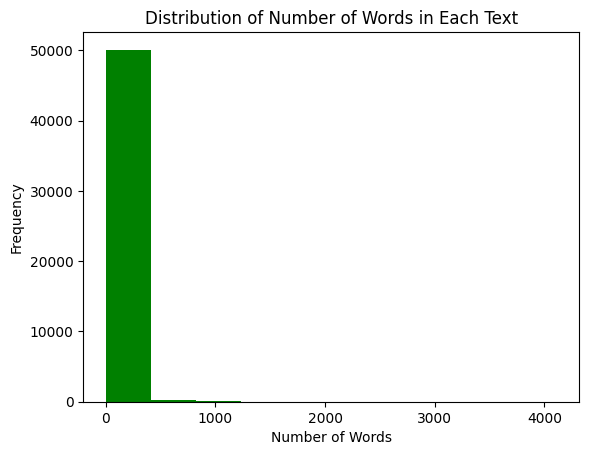

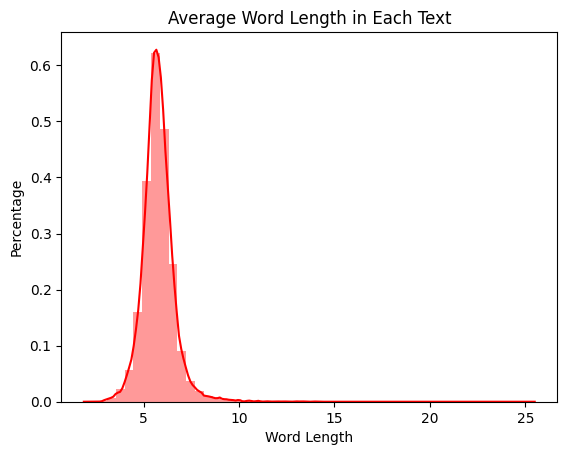

We have 73235 unique words in our vocabulary
We have 40339 Training datasets and 10085 Testing datasets.
Model Accuracy: 95.76598909271195%
Model Accuracy: 97.37233515121467%


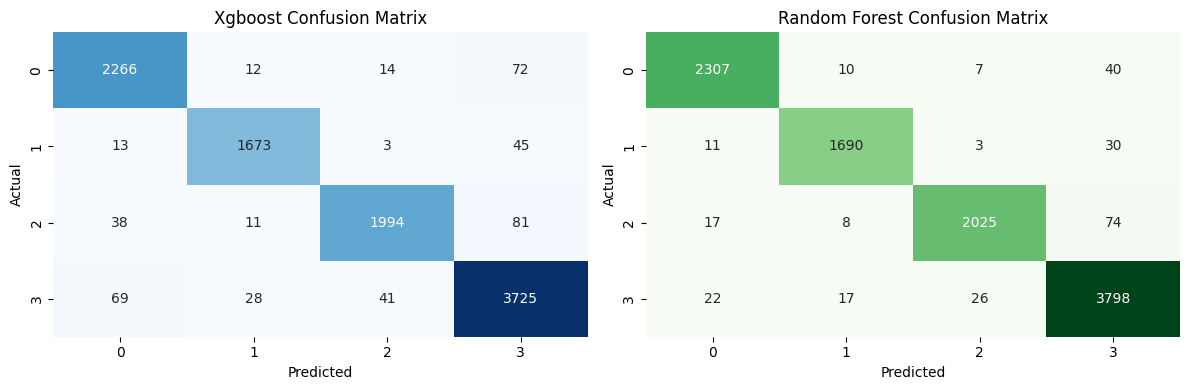

XGBoost F1 Score: 0.9576615607853174
Random Forest F1 Score: 0.9737094187997896
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2364
           1       0.97      0.96      0.97      1734
           2       0.97      0.94      0.95      2124
           3       0.95      0.96      0.96      3863

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2364
           1       0.98      0.97      0.98      1734
           2       0.98      0.95      0.97      2124
           3       0.96      0.98      0.97      3863

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085

AJANTA ROYAL Individual Synthetic Polymer Wood Pho

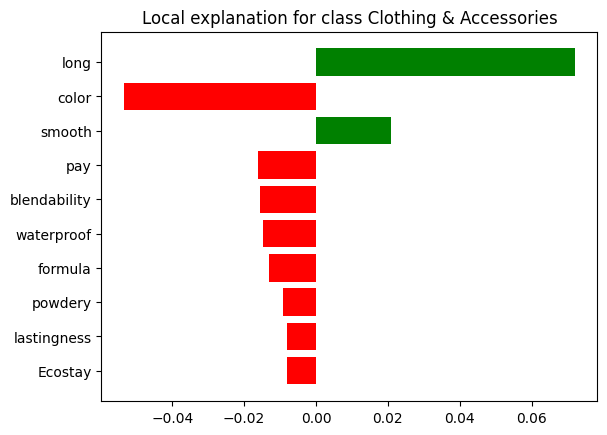

In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS

# Importing joblib for model saving and loading
from joblib import dump, load

# Importing machine learning tools for text vectorization, label encoding, and model evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Importing NLP library
import spacy

# Importing LIME for model interpretability
from lime.lime_text import LimeTextExplainer

# Additional imports for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Suppressing warnings and importing matplotlib for visualization
import warnings
import random
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# --------------------------------------------------
# Setting up the data directory and dataset name
data_dir = 'ecommerceDataset.csv'
ds_name = 'Ecommerce text classification'

# --------------------------------------------------
# Reading the dataset
df = pd.read_csv(data_dir, header = None)
df.head()

# --------------------------------------------------
# Renaming dataframe columns
df.columns = ['label', 'text']

# --------------------------------------------------
# Displaying the first few rows of the dataframe
df.head()
random_index = random.choice(df.index)  # Choosing a random row from the dataframe

# --------------------------------------------------
# Function to print the shape of the dataset
def ds_shape(df, ds_name='df'):
    print(f"The {ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} Columns")

ds_shape(df, ds_name)

# --------------------------------------------------
# Function to print the information about the dataset
def ds_info(df, ds_name='df'):
    print(f"The {ds_name} dataset info:\n")
    print(df.info())

ds_info(df, ds_name)

# --------------------------------------------------
# Function to check for null values in the dataset
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df, ds_name)

# --------------------------------------------------
# Function to plot the distribution of missing values
def plot_miss_vals(df, ds_name="df"):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

plot_miss_vals(df, ds_name)

# --------------------------------------------------
# Identifying the index of the first null value in 'text' column
null_val_ind = df[df['text'].isnull()].index[0]
null_val_ind

# --------------------------------------------------
# Dropping rows with null values
df.drop([null_val_ind], axis=0, inplace = True)

# --------------------------------------------------
# Function to display the number of unique values in each column
def uni_vals(df, ds_name='df'):

    print(f"The number of unique values in each column in {ds_name} dataset:\n")
    print(df.nunique())

uni_vals(df, ds_name)

# --------------------------------------------------
# Function for summary statistics and visualization of categorical data
def cat_summary_with_graph(dataframe, col_name):
    # ... [Remaining code for visualization]

# Defining a color palette for visualizations
    colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
          '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

# --------------------------------------------------
# Visualizing the 'label' column
cat_summary_with_graph(df, 'label')

# --------------------------------------------------
# Function to visualize a word cloud for a specified column
# Function for visualizing a word cloud based on text data in a specified column
def wordcloud_vis(df, col_name):

    # Setting up the figure size for the word cloud visualization
    plt.figure(figsize=(20, 20))

    # Generating the word cloud:
    # - max_words: maximum number of words to display
    # - width and height: dimensions of the word cloud image
    # - stopwords: words to be ignored while generating the word cloud
    wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df[col_name]))

    # Displaying the word cloud image with bilinear interpolation for smoothness
    plt.imshow(wc, interpolation='bilinear')

    # Removing x and y axis ticks (for cleaner visualization without axis values)
    plt.xticks([])
    plt.yticks([])

    # Displaying the plot
    plt.show()

# --------------------------------------------------
# Function to count the number of letters in each text entry and visualize the distribution
def number_letters(df, col_name):
    # Counting the number of letters in each row of the specified column
    letters_len = df[col_name].str.len()

    # Plotting histogram of the count of letters
    plt.hist(letters_len, color='red')
    plt.title("Distribution of Number of Letters in Each Text")
    plt.xlabel("Number of Letters")
    plt.ylabel("Frequency")
    plt.show()


# Calling the number_letters function on the 'text' column of the dataframe
number_letters(df, 'text')

# --------------------------------------------------
# Function to count the number of words in each text entry and visualize the distribution
def number_words(df, col_name):
    # Calculating the length of words in each row
    words_len = df[col_name].str.split().map(lambda x: len(x))

    # Plotting histogram of word lengths
    plt.hist(words_len, color='green')
    plt.title("Distribution of Number of Words in Each Text")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

# Calling the number_words function on the 'text' column of the dataframe
number_words(df, 'text')

# --------------------------------------------------
# Function to calculate and visualize the average word length in each text
def avg_word_len(df, col_name):
    # Splitting text into words and calculating the length of each word
    word = df[col_name].str.split().apply(lambda x: [len(i) for i in x])
    # Calculating the average length of words in each row
    word = word.map(lambda x: np.mean(x))

    # Plotting distribution plot of average word lengths
    sns.distplot(word, color='red')
    plt.title("Average Word Length in Each Text")
    plt.xlabel("Word Length")
    plt.ylabel("Percentage")
    plt.show()

# Calling the avg_word_len function on the 'text' column of the dataframe
avg_word_len(df, 'text')

# --------------------------------------------------
# Loading Spacy's English language model
nlp = spacy.load('en_core_web_sm')

# --------------------------------------------------
# Function to preprocess text: lemmatization and removing stopwords and punctuation
def preprocess(text):
    # Processing the text using Spacy
    doc = nlp(text)
    preprocessed = []

    # Lemmatizing and filtering out stopwords and punctuation
    for token in doc:
        if not token.is_stop and not token.is_punct:
            preprocessed.append(token.lemma_)

    # Joining the preprocessed tokens back into a string
    flat = ' '.join(preprocessed)
    return flat

# Preprocessing the 'text' column and creating a new 'preprocessed_text' column
df['preprocessed_text'] = df['text'].apply(preprocess)

# --------------------------------------------------
# Displaying the original text of the first row
df['text'][0]

# Displaying the preprocessed text of the first row
df['preprocessed_text'][0]

# --------------------------------------------------
# Converting the preprocessed text to lowercase
df['preprocessed_text'] = df['preprocessed_text'].str.lower()

# Visualizing the word cloud for the 'preprocessed_text' column
wordcloud_vis(df, 'preprocessed_text')

# Counting and visualizing the number of letters in the 'preprocessed_text' column
number_letters(df, 'preprocessed_text')

# Counting and visualizing the number of words in the 'preprocessed_text' column
number_words(df, 'preprocessed_text')

# Calculating and visualizing the average word length in the 'preprocessed_text' column
avg_word_len(df, 'preprocessed_text')

# --------------------------------------------------
# Preparing data for model training
X = df['preprocessed_text']
y = df['label']

# --------------------------------------------------
# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X.values)
print(f"We have {X_tfidf.shape[1]} unique words in our vocabulary")

# Saving the TF-IDF vectorizer to a file
dump(vectorizer, 'tfidf_vectorizer.pkl')

# --------------------------------------------------
# Encoding the labels using Label Encoder
lbl_enc = LabelEncoder()
y_enc = lbl_enc.fit_transform(y.values)
y_enc[:5]

# Creating a mapping of original labels to encoded labels
label_mapping = {label: encoded for label, encoded in zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_))}
label_mapping

# Saving the label mapping dictionary to a file
dump(label_mapping, 'label_mapping_dict.pkl')

# --------------------------------------------------
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,  # TF-IDF vectorized text data
    y_enc,    # Encoded labels
    random_state=123,  # Random state for reproducibility
    test_size=0.2,     # 20% of data used as test set
    shuffle=True,      # Shuffle the data before splitting
    stratify=y_enc)    # Stratify split according to labels

# Printing the number of training and testing datasets
print(f"We have {X_train.shape[0]} Training datasets and {X_test.shape[0]} Testing datasets.")

# --------------------------------------------------
# Function for training a model and evaluating its performance
def modeling(model, X_train, y_train, X_test, y_test):
    # Fitting the model on training data
    model.fit(X_train, y_train)
    # Predicting on test data
    y_pred = model.predict(X_test)
    # Calculating accuracy
    score = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {score*100}%")
    return y_pred

# --------------------------------------------------
# Creating and evaluating XGBoost model
xgboost_model = XGBClassifier()
xgboost_ypred = modeling(xgboost_model, X_train, y_train, X_test, y_test)

# Creating and evaluating Random Forest model
rf_model = RandomForestClassifier()
rf_ypred = modeling(rf_model, X_train, y_train, X_test, y_test)

# --------------------------------------------------
# Generating confusion matrices for both models
xgboost_conf_matrix = confusion_matrix(y_test, xgboost_ypred)
rf_conf_matrix = confusion_matrix(y_test, rf_ypred)

# Plotting confusion matrices for both models
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(xgboost_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Xgboost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(rf_conf_matrix, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Calculating F1 scores for both models
xgboost_f1 = f1_score(y_test, xgboost_ypred, average='weighted')
print("XGBoost F1 Score:", xgboost_f1)

rf_f1 = f1_score(y_test, rf_ypred, average='weighted')
print("Random Forest F1 Score:", rf_f1)

# --------------------------------------------------
# Function to print classification report for a model
def class_report(y_test, y_pred):
    print(classification_report(y_test, y_pred))

# Generating classification reports for both models
class_report(y_test, xgboost_ypred)
class_report(y_test, rf_ypred)

# --------------------------------------------------
# Saving the Random Forest model to a file
dump(rf_model, 'model.joblib')

# --------------------------------------------------
# Loading the saved Random Forest model and the vectorizer and label mapping dictionaries
model = load('model.joblib')
loaded_vectorizer = load('tfidf_vectorizer.pkl')
loaded_label_mapping = load('label_mapping_dict.pkl')

# --------------------------------------------------
# Loading Spacy's English language model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text: lemmatization and removing stopwords and punctuation
def preprocess(text):
    doc = nlp(text)
    preprocessed = []

    for token in doc:
        if not token.is_stop and not token.is_punct:
            preprocessed.append(token.lemma_)

    flat = ' '.join(preprocessed)
    return flat

# Function to predict the category of a given text using the trained model
def predict(text, vectorizer, label_mapping, model):
    # Preprocessing the input text
    preprocessed_text = preprocess(text)
    # Vectorizing the preprocessed text
    transformed_text = vectorizer.transform([preprocessed_text])
    # Predicting the category
    result = model.predict(transformed_text)
    # Decoding the predicted label
    decoded_label = list(label_mapping.keys())[list(label_mapping.values()).index(result)]
    print(f"The Ecommerce text is classified as {decoded_label}.")

# --------------------------------------------------
# Selecting a sample text and its true label for prediction
text = df['text'][4848]
true_label = df['label'][4848]
print(text)

# --------------------------------------------------
# Displaying the true label and using the model to predict the label
print(f"True Label is {true_label}")
print("-"*50)
print("Model Results:")
predict(text, loaded_vectorizer, loaded_label_mapping, model)

# --------------------------------------------------
# Repeating the process with different text samples and their true labels
text = df['text'][26987]
true_label = df['label'][26987]
print(text)

# --------------------------------------------------
print(f"True Label is {true_label}")
print("-"*50)
print("Model Results:")
predict(text, loaded_vectorizer, loaded_label_mapping, model)

# --------------------------------------------------
text = df['text'][38956]
true_label = df['label'][38956]
print(text)

# --------------------------------------------------
print(f"True Label is {true_label}")
print("-"*50)
print("Model Results:")
predict(text, loaded_vectorizer, loaded_label_mapping, model)

# --------------------------------------------------
text = df['text'][47851]
true_label = df['label'][47851]
print(text)

# --------------------------------------------------
print(f"True Label is {true_label}")
print("-"*50)
print("Model Results:")
predict(text, loaded_vectorizer, loaded_label_mapping, model)

# --------------------------------------------------
# Function to explain the model's prediction using LIME (Local Interpretable Model-agnostic Explanations)
def explain_prediction(text, model, vectorizer, label_mapping):
    # Create a LimeTextExplainer instance
    explainer = LimeTextExplainer(class_names=list(label_mapping.keys()))

    # Define a function for predicting probabilities, which will be used by the explainer
    def predict_proba(texts):
        return model.predict_proba(vectorizer.transform(texts))

    # Generate an explanation for the specified text
    exp = explainer.explain_instance(text, predict_proba, num_features=10)
    plt.switch_backend('Agg')  # Switch to a non-interactive backend for saving the figure
    fig = exp.as_pyplot_figure()
    fig.savefig('lime_explanation.png')  # Save the explanation figure to a file

# --------------------------------------------------
# Selecting a random text sample for explanation
text_to_explain = df.loc[random_index, 'text']

# Load the trained model, vectorizer, and label mapping
model = load('model.joblib')
vectorizer = load('tfidf_vectorizer.pkl')
label_mapping = load('label_mapping_dict.pkl')

# Call the explain_prediction function to explain the model's decision
explain_prediction(text_to_explain, model, vectorizer, label_mapping)




